# Tutorial

In this tutorial, we provide some example code on how to use the REST API of CRDB, if you are interested in low-level access, but you can skip that and directly use our Python package `crdb`, which hides the technical details.

The Python package `crdb` can be used to access the data directly in form of NumPy arrays or used on the command line to download data from the CRDB in various formats, including the common CSV format. You can then process the downloaded files in any programming language as you prefer.

The notebook `gallery.ipynb` in this repository contains several standard plots generated with the Python package `crdb`. You are invited to use these as starting points for your own plots.

## Access CRDB via REST API (for technical enthusiasts, may be skipped)

**We explain how this low-level access works in this section, but note that high-level access is provided via the `crdb` Python package and command line interface, that is the recommended way to access CRDB, see next section for details.**

A [REST](https://en.wikipedia.org/wiki/Representational_state_transfer) interface is available at the following URL: http://lpsc.in2p3.fr/crdb/rest.php to query the database. 

Click on the tab "REST interface" to see the list of parameters. Minimal required are the parameters `num` and `energy_type`. There are several optional parameters, see the website for details.

A REST query to the database is asking for data. The parameters specify what data to pull and in which format. The query URL has this format:

`url?par1=value1&par2=value2&...&parN=valueN`

where `url` is `http://lpsc.in2p3.fr/crdb/rest.php`, `par1` to `parN` are parameter names and `value1` to `valueN` are parameter values. Name and value pairs are connected by `=`, and individual pairs are linked by `&`.

The `num` parameter is the element, isotope, or particle, whose flux is requested. Valid values are `H`, `He`, `e+` written as `e%2B`, `3H`, and so on. A flux ratio can be requested by also providing the optional `den` parameter, then `num` stands for numerator and `den` for denominator. The other required parameter is `energy_type`. It is used to request the energy unit. Valid values are `EKN`, `EK`, `R`, `ETOT`. See the website for details.

### Using curl

To run low-level queries from the command-line you can use the program `curl`, which is available for Linux and MacOSX (e.g. via homebrew).

We demonstate how to use `curl` in this notebook using the `!<shell command>` syntax, which allows us to execute commands on the command line. The following downloads all available boron-to-carbon flux ratios as a function of kinetic energy per nucleon, and save the output in a file called `db.txt`.

In [1]:
!curl -L 'http://lpsc.in2p3.fr/crdb/rest.php?num=B&den=C&energy_type=EKN' > db.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   255  100   255    0     0   5146      0 --:--:-- --:--:-- --:--:--  6219
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   265  100   265    0     0    767      0 --:--:-- --:--:-- --:--:--   767
100  160k    0  160k    0     0   185k      0 --:--:-- --:--:-- --:--:--  484k


In [2]:
# first 25 lines of what we downloaded
!head -25 db.txt

# Data export from CRDB [http://lpsc.in2p3.fr/crdb]
# Please cite CRDB publications:
#  - Maurin, Melot, Taillet, A&A 569, A32 (2014) [https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M]
#  - Maurin, Dembinski, Gonzalez et al., Univ. 6, 102 (2020) [https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M]
# Date: 2023/05/08-15:42:14
# Format: CSV code (as import, with extra column for modulation)
# Col.1  - EXP-NAME
# Col.2  - EXP-TYPE
# Col.3  - EXP-HTML
# Col.4  - EXP-STARTYEAR
# Col.5  - SUBEXP-NAME
# Col.6  - SUBEXP-DESCRIPTION
# Col.7  - SUBEXP-ESCALE_RELERR
# Col.8  - SUBEXP-INFO
# Col.9  - SUBEXP-DISTANCE
# Col.10  - SUBEXP-DATES
# Col.11  - PUBLI-HTML
# Col.12  - PUBLI-DATAORIGIN
# Col.13  - DATA-QTY
# Col.14  - DATA-EAXIS
# Col.15  - DATA-E_MEAN
# Col.16  - DATA-E_BIN_L
# Col.17  - DATA-E_BIN_U
# Col.18  - DATA-VAL
# Col.19  - DATA-VAL_ERRSTAT_L


## `crdb` Python package

We provide the Python package `crdb` which provides high-level access to the CRDB using the REST API. You don't need to know how this works to use the `crdb` package. You can import `crdb` as Python package and use the queried data in form of NumPy arrays directly in scripts and notebooks. Or you can use the `crdb` command-line interface to download queried data in various ASCII formats.

### Usage from Python

In [3]:
import crdb

help(crdb.query)

Help on function query in module crdb._lib:

query(quantity: 'Union[str, Sequence[str]]', *, energy_type: 'str' = 'R', combo_level: 'int' = 1, energy_convert_level: 'int' = 1, flux_rescaling: 'float' = 0.0, exp_dates: 'str' = '', energy_start: 'float' = 0.0, energy_stop: 'float' = 0.0, time_start: 'str' = '', time_stop: 'str' = '', time_series: 'str' = '', modulation: 'str' = '', timeout: 'int' = 120, server_url: 'str' = 'http://lpsc.in2p3.fr/crdb') -> 'np.recarray'
    Query CRDB and return table as a numpy array.
    
    See http://lpsc.in2p3.fr/crdb for documentation which parameters are accepted.
    
    Parameters
    ----------
    quantity: str or sequence of str
        Element, isotope, particle, or mass group, or ratio of those, e.g. 'H', 'B/C'.
        For valid names, see the constant crdb.VALID_NAMES. Multiple quantities can be
        bundled in a sequence for convenience, but this is not more efficient than
        running multiple queries by hand.
    energy_type: str

In [4]:
# get boron-to-carbon flux ratios measured in kinetic energy per
# nucleon as a numpy record array
tab = crdb.query("B/C", energy_type="EKN")

# print column names
for icol, col_name in enumerate(tab.dtype.fields):
    print("%2i" % icol, col_name)

 0 exp
 1 exp_type
 2 sub_exp
 3 e_relerr
 4 distance
 5 datetime
 6 ads
 7 quantity
 8 e_type
 9 e
10 e_bin
11 value
12 err_sta
13 err_sys
14 is_upper_limit
15 phi


In [5]:
# show mean energies, flux values, and sub-experiment for the first 20 entries
tab[["e", "value", "sub_exp"]][:20]

rec.array([(0.072     , 0.23276835, 'ACE-CRIS (1997/08-1998/04)'),
           (0.085     , 0.23610874, 'ACE-CRIS (1997/08-1998/04)'),
           (0.1       , 0.2390259 , 'ACE-CRIS (1997/08-1998/04)'),
           (0.12      , 0.22743129, 'ACE-CRIS (1997/08-1998/04)'),
           (0.142     , 0.24395055, 'ACE-CRIS (1997/08-1998/04)'),
           (0.17      , 0.24698796, 'ACE-CRIS (1997/08-1998/04)'),
           (0.0774597 , 0.24070001, 'ACE-CRIS (1998/01-1999/01)'),
           (0.09998   , 0.2473    , 'ACE-CRIS (1998/01-1999/01)'),
           (0.117473  , 0.2489    , 'ACE-CRIS (1998/01-1999/01)'),
           (0.134977  , 0.25709999, 'ACE-CRIS (1998/01-1999/01)'),
           (0.150987  , 0.25549999, 'ACE-CRIS (1998/01-1999/01)'),
           (0.162481  , 0.26539999, 'ACE-CRIS (1998/01-1999/01)'),
           (0.17599716, 0.25697504, 'ACE-CRIS (1998/01-1999/01)'),
           (0.072     , 0.29779736, 'ACE-CRIS (2001/05-2003/09)'),
           (0.085     , 0.29678937, 'ACE-CRIS (2001/05-2003/09

`crdb.query` returns a Numpy record array, which means that the fields are also accessible as attributes. This saves some typing.

In [6]:
for t in tab[:10]:
    # instead of print(t["e"], t["value"]) you can do
    print(t.e, t.value)

0.07199999690055847 0.23276835313464758
0.08500000089406967 0.23610874463425718
0.10000000149011612 0.2390259038623218
0.11999999731779099 0.22743128741112612
0.1420000046491623 0.2439505519120392
0.17000000178813934 0.24698796063962966
0.07745970040559769 0.24070000648498535
0.09997999668121338 0.24729999899864197
0.11747299879789352 0.24889999628067017
0.13497699797153473 0.257099986076355


Let's list all the experiments which contributed this data.  

In [7]:
import numpy as np

for exp in np.unique(tab.sub_exp):
    print(exp)

ACE-CRIS (1997/08-1998/04)
ACE-CRIS (1998/01-1999/01)
ACE-CRIS (2001/05-2003/09)
ACE-CRIS (2009/03-2010/01)
AMS01 (1998/06)
AMS02 (2011/05-2016/05)
ATIC02 (2003/01)
Balloon (1964/03-1965/07)
Balloon (1965/06)
Balloon (1966/07+1967/05-06-07)
Balloon (1971/09+1972/10)
Balloon (1972/10)
Balloon (1973/09+1974/05+1975/09+1975/10)
Balloon (1976/09)
Balloon (1976/10)
Balloon (1991/09)
CALET (2015/10-2022/02)
CREAM-I (2004/12-2005/01)
CRN-Spacelab2 (1985/07-1985/08)
DAMPE (2016/01-2021/12)
GSFC (1973/08)
Gemini11 (1966/08)
HEAO3-C2 (1979/10-1980/06)
IMP5 (1969/06-1970/06)
IMP7 (1973/05-1973/12)
IMP8 (1974/01-1978/10)
ISEE3-HKH (1978/08-1981/04)
OGO1 (1965/03-1965/06)
PAMELA (2006/07-2008/03)
TRACER (2006/07)
UNH (1970/07)
UNH (1974/07+1974/08+1976/09)
UNH (1977/09)
UNH (1981/09)
Ulysses-HET (1990/10-1995/07)
Voyager1&2 (1977/01-1993/12)
Voyager1&2 (1977/01-1996/12)
Voyager1&2 (1977/01-1998/12)
Voyager1-HET-Aend (2012/12-2015/06)
Voyager1-HET-Bend (2012/12-2014/12)
Voyager1-LET (2012/12-2015/06

The metadata in parentheses refers to the data taking campaign. We strip that information and generate masks which select all data points from a particular experiment.

In [8]:
experiments = {}
for this_sub_exp in np.unique(tab.sub_exp):
    exp = this_sub_exp[: this_sub_exp.find("(")]
    mask = tab.sub_exp == this_sub_exp
    exp_mask = experiments.get(exp, False)
    exp_mask |= mask
    experiments[exp] = exp_mask

for exp, mask in experiments.items():
    print(exp, np.sum(mask), "entries")

ACE-CRIS  25 entries
AMS01  10 entries
AMS02  67 entries
ATIC02  5 entries
Balloon  50 entries
CALET  20 entries
CREAM-I  6 entries
CRN-Spacelab2  3 entries
DAMPE  13 entries
GSFC  9 entries
Gemini11  1 entries
HEAO3-C2  14 entries
IMP5  2 entries
IMP7  3 entries
IMP8  7 entries
ISEE3-HKH  7 entries
OGO1  1 entries
PAMELA  18 entries
TRACER  6 entries
UNH  55 entries
Ulysses-HET  2 entries
Voyager1&2  4 entries
Voyager1-HET-Aend  5 entries
Voyager1-HET-Bend  3 entries
Voyager1-LET  1 entries
Voyager2-HET  1 entries


This grouping code is quite useful, so there is a function `crdb.experiment_masks` in the `crdb` package which automates this and further combines different versions of the same experiments by default, like IMP5, IMP7, etc., but keeps AMS01 and AMS02 separate.

Let's plot the B/C ratios of these experiments with `matplotlib`.

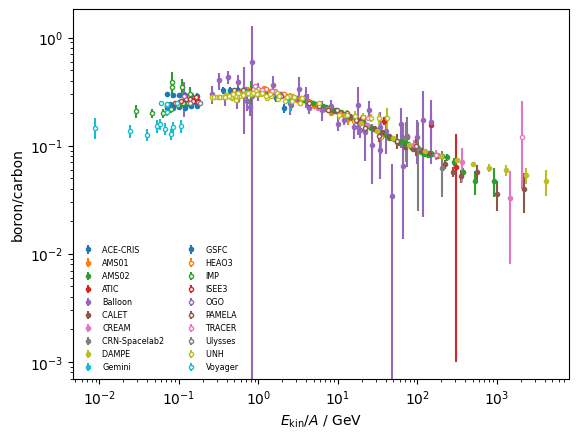

In [9]:
from matplotlib import pyplot as plt

# plot each experiment with different color
for i, (exp, mask) in enumerate(crdb.experiment_masks(tab).items()):
    t = tab[mask]
    sta = np.transpose(t.err_sta)
    color = f"C{i}"
    mfc = "w" if i > 10 else color
    plt.errorbar(
        t.e, t.value, sta, fmt=".", mfc=mfc, mec=color, ecolor=color, label=exp
    )

plt.legend(ncol=2, frameon=False, fontsize="xx-small")
plt.xlabel("$E_\\mathrm{kin} / A$ / GeV")
plt.ylabel("boron/carbon")
plt.loglog();

`crdb.query` caches the server response for 30 days. Running the same query repeatedly during development is convenient. It will be slow only the first time. The second time will be fast.

For example, if we want to plot the fluxes of several elements vs. rigidity scaled with $R^2$, we would run this code:

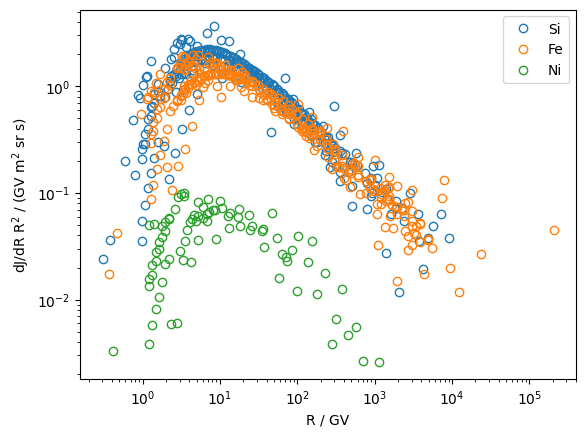

In [10]:
for ielem, elem in enumerate(("Si", "Fe", "Ni")):
    tab2 = crdb.query(elem, energy_type="R", flux_rescaling=2, energy_convert_level=2)
    plt.plot(tab2.e, tab2.value, "o", color="none", mec=f"C{ielem}", label=elem)
plt.xlabel("R / GV")
plt.ylabel("dJ/dR R$^2$ / (GV m$^2$ sr s)")
plt.legend()
plt.loglog();

The queries will take some time if this code runs for the first time.

If we decide that another style would prettier, we can just modify the plotting code and keep the rest the same. Running this will be fast now.

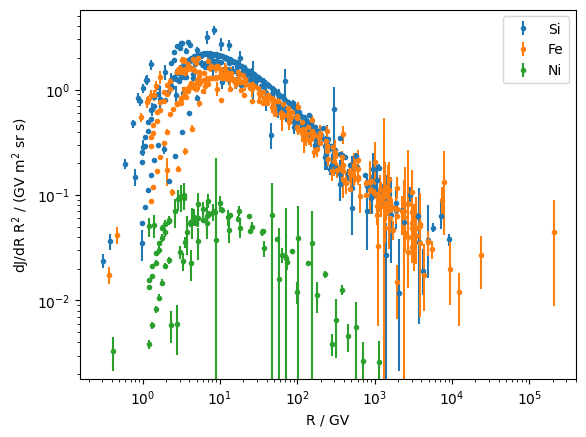

In [11]:
# plot fluxes of several elements vs rigidity scaled with R^2
for ielem, elem in enumerate(("Si", "Fe", "Ni")):
    tab2 = crdb.query(elem, energy_type="R", flux_rescaling=2, energy_convert_level=2)
    sta = np.transpose(tab2.err_sta)
    plt.errorbar(tab2.e, tab2.value, sta, fmt=".", color=f"C{ielem}", label=elem)
plt.xlabel("R / GV")
plt.ylabel("dJ/dR R$^2$ / (GV m$^2$ sr s)")
plt.legend()
plt.loglog();

If you ever need to clear the cache (only necessary if crdb Python package or CRDB server was updated), run `crdb.clear_cache()`.

For more examples see `gallery.ipynb` in this repository.

### Command-line interface

The `crdb` Python package comes with a command-line interface. Use this to download the raw CRDB data in one of the supported formats.

We demonstate this in this notebook using the `!<shell command>` syntax, which allows us to execute commands on the command line.

You can get help like this:

In [12]:
!crdb -h

usage: crdb [-h] [--energy-type ENERGY_TYPE] [--combo-level COMBO_LEVEL]
            [--energy-convert-level ENERGY_CONVERT_LEVEL]
            [--flux-rescaling FLUX_RESCALING] [--exp-dates EXP_DATES]
            [--energy-start ENERGY_START] [--energy-stop ENERGY_STOP]
            [--time-start TIME_START] [--time-stop TIME_STOP]
            [--time-series TIME_SERIES] [--format FORMAT]
            [--modulation MODULATION] [--server-url SERVER_URL]
            [--timeout TIMEOUT] [--version]
            quantity

Command line interface for CRDB. Returns unprocessed DB output to stdout.

positional arguments:
  quantity              Element, isotope, particle, or mass group, or ratio of
                        those, e.g. 'H', 'B/C'. For valid names, see the
                        constant crdb.VALID_NAMES. Multiple quantities can be
                        bundled in a sequence for convenience, but this is not
                        more efficient than running multiple queries by h

Let's try to get nickel data.

In [13]:
!crdb Ni

# Data export from CRDB [http://lpsc.in2p3.fr/crdb]
# Please cite CRDB publications:
#  - Maurin, Melot, Taillet, A&A 569, A32 (2014) [https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M]
#  - Maurin, Dembinski, Gonzalez et al., Univ. 6, 102 (2020) [https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M]
# Date: 2023/05/08-15:40:13
# Format: CSV code (as import, with extra column for modulation)
# Col.1  - EXP-NAME
# Col.2  - EXP-TYPE
# Col.3  - EXP-HTML
# Col.4  - EXP-STARTYEAR
# Col.5  - SUBEXP-NAME
# Col.6  - SUBEXP-DESCRIPTION
# Col.7  - SUBEXP-ESCALE_RELERR
# Col.8  - SUBEXP-INFO
# Col.9  - SUBEXP-DISTANCE
# Col.10  - SUBEXP-DATES
# Col.11  - PUBLI-HTML
# Col.12  - PUBLI-DATAORIGIN
# Col.13  - DATA-QTY
# Col.14  - DATA-EAXIS
# Col.15  - DATA-E_MEAN
# Col.16  - DATA-E_BIN_L
# Col.17  - DATA-E_BIN_U
# Col.18  - DATA-VAL
# Col.19  - DATA-VAL_ERRSTAT_L
# Col.20  - DATA-VAL_ERRSTAT_U
# Col.21  - DATA-VAL_ERRSYST_L
# Col.22  - DATA-VAL_ERRSYST_U
# Col.23  - DATA-ISUPPERLIM
# Col.24  

We got an empty table, because the default `energy-type` is R (rigidity), but the available nickel data was measured in EKN, kinetic energy per nucleon. `crdb` will not automatically convert between these energy types, because this cannot be done exactly. We can either change the energy type in the query or allow approximate energy conversion to fix this.

In [14]:
# query EKN instead of R ...
!crdb Ni --energy-type EKN

# Data export from CRDB [http://lpsc.in2p3.fr/crdb]
# Please cite CRDB publications:
#  - Maurin, Melot, Taillet, A&A 569, A32 (2014) [https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M]
#  - Maurin, Dembinski, Gonzalez et al., Univ. 6, 102 (2020) [https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M]
# Date: 2023/05/08-15:40:26
# Format: CSV code (as import, with extra column for modulation)
# Col.1  - EXP-NAME
# Col.2  - EXP-TYPE
# Col.3  - EXP-HTML
# Col.4  - EXP-STARTYEAR
# Col.5  - SUBEXP-NAME
# Col.6  - SUBEXP-DESCRIPTION
# Col.7  - SUBEXP-ESCALE_RELERR
# Col.8  - SUBEXP-INFO
# Col.9  - SUBEXP-DISTANCE
# Col.10  - SUBEXP-DATES
# Col.11  - PUBLI-HTML
# Col.12  - PUBLI-DATAORIGIN
# Col.13  - DATA-QTY
# Col.14  - DATA-EAXIS
# Col.15  - DATA-E_MEAN
# Col.16  - DATA-E_BIN_L
# Col.17  - DATA-E_BIN_U
# Col.18  - DATA-VAL
# Col.19  - DATA-VAL_ERRSTAT_L
# Col.20  - DATA-VAL_ERRSTAT_U
# Col.21  - DATA-VAL_ERRSYST_L
# Col.22  - DATA-VAL_ERRSYST_U
# Col.23  - DATA-ISUPPERLIM
# Col.24  

In [15]:
# ... or allow approximate energy conversion
!crdb Ni --energy-type R --energy-convert-level 2

# Data export from CRDB [http://lpsc.in2p3.fr/crdb]
# Please cite CRDB publications:
#  - Maurin, Melot, Taillet, A&A 569, A32 (2014) [https://ui.adsabs.harvard.edu/abs/2014A%26A...569A..32M]
#  - Maurin, Dembinski, Gonzalez et al., Univ. 6, 102 (2020) [https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M]
# Date: 2023/05/08-15:40:39
# Format: CSV code (as import, with extra column for modulation)
# Col.1  - EXP-NAME
# Col.2  - EXP-TYPE
# Col.3  - EXP-HTML
# Col.4  - EXP-STARTYEAR
# Col.5  - SUBEXP-NAME
# Col.6  - SUBEXP-DESCRIPTION
# Col.7  - SUBEXP-ESCALE_RELERR
# Col.8  - SUBEXP-INFO
# Col.9  - SUBEXP-DISTANCE
# Col.10  - SUBEXP-DATES
# Col.11  - PUBLI-HTML
# Col.12  - PUBLI-DATAORIGIN
# Col.13  - DATA-QTY
# Col.14  - DATA-EAXIS
# Col.15  - DATA-E_MEAN
# Col.16  - DATA-E_BIN_L
# Col.17  - DATA-E_BIN_U
# Col.18  - DATA-VAL
# Col.19  - DATA-VAL_ERRSTAT_L
# Col.20  - DATA-VAL_ERRSTAT_U
# Col.21  - DATA-VAL_ERRSYST_L
# Col.22  - DATA-VAL_ERRSYST_U
# Col.23  - DATA-ISUPPERLIM
# Col.24  